## Se tiene la importacion de todo lo necesario para el analisis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
#nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import pos_tag, ne_chunk
pd.set_option('display.max_rows', None)

Se lee el fichero

In [2]:
try:
    datos = pd.read_csv('Datos.csv')
    fichero = open('Coursera Comments.txt', encoding='utf-8')
    comentarios = fichero.read()
    comentarios = re.sub(r'[^A-Za-zÁÉÍÓÚáéíóúÑñ ]+', '', comentarios)
except:
  print("Fallas al leer ficheros")

Se tiene el total de cursos

In [3]:
totalCursos = datos["Schedule"].size

Se tiene la limpieza de datos nulos

In [4]:
datos = datos.dropna()

### Se obtienen los promedios

In [5]:
promedios = datos.groupby(['Course Title'])['Rating'].mean()

titulo_mayor_promedio = promedios.idxmax()
promedio_mayor = promedios.max()

titulo_menor_promedio = promedios.idxmin()
promedio_menor = promedios.min()

In [6]:
print(promedios)

Course Title
 Assisting Public Sector Decision Makers With Policy Analysis                                                           4.800000
 Comercio, Inmigración y Tipos de Cambio en un Mundo Globalizado                                                        4.900000
 FPGA computing systems: Background knowledge and introductory materials                                                4.600000
 Future Healthcare Payment Models                                                                                       4.500000
 IBM and ISC2 Cybersecurity Specialist Professional Certificate                                                         4.800000
 Improving Immunity Based on Traditional Eastern Exercises                                                              4.500000
 Introduction to Academic Writing                                                                                       4.400000
 Natural Language Processing and Capstone Assignment                                

Se tiene la obtencion del mayor y menor rating:

In [7]:
print(f"Curso con el mayor promedio: {titulo_mayor_promedio} - Promedio: {promedio_mayor}")
print(f"Curso con el menor promedio: {titulo_menor_promedio} - Promedio: {promedio_menor}")

Curso con el mayor promedio: Activity Design with PhET Simulations for STEM Education - Promedio: 5.0
Curso con el menor promedio: Selenium WebDriver with Python - Promedio: 3.1


Se obtiene los cursos con horario flexible

In [8]:
flexibles2 = datos.groupby("Schedule").size()

In [9]:
print(f"El porcenta de cursos con horario flexible es de = {np.round((flexibles2['Flexible schedule']/totalCursos)*100, 2)}%")

El porcenta de cursos con horario flexible es de = 36.65%


Se crean llaman las funciones nlkt para el analisis de los comentarios

In [10]:
enviados_tokenizados = sent_tokenize(comentarios)
ps = PorterStemmer()
wnl = WordNetLemmatizer()
analyzer = SentimentIntensityAnalyzer()
palabras_tokenizadas = word_tokenize(comentarios)
si = SentimentIntensityAnalyzer()

Lemantizacion y Steaming de las palabras de los comentarios

In [11]:
lematizacion = []
for p in palabras_tokenizadas:
    lematizacion.append(wnl.lemmatize(p, pos="v"))
steaming = []
for p in palabras_tokenizadas:
    steaming.append(ps.stem(p))

In [12]:
steaming

['abril',
 'varga',
 'pérez',
 'opinionesptvalorada',
 'con',
 'estrella',
 'sobr',
 'ago',
 'escandalizada',
 'y',
 'confundida',
 'por',
 'lasescandalizada',
 'y',
 'confundida',
 'por',
 'la',
 'mala',
 'reseñasestoy',
 'en',
 'coursera',
 'desd',
 'el',
 'me',
 'de',
 'julio',
 'y',
 'estoy',
 'haciendo',
 'actualment',
 'el',
 'curso',
 'de',
 'frontend',
 'develop',
 'que',
 'impart',
 'metapara',
 'entrar',
 'a',
 'est',
 'curso',
 'tenía',
 'que',
 'pagar',
 'coursera',
 'plu',
 'dond',
 'tien',
 'acceso',
 'a',
 'todo',
 'lo',
 'curso',
 'por',
 'euro',
 'mensual',
 'duré',
 'en',
 'un',
 'periodo',
 'de',
 'prueba',
 'grati',
 'de',
 'día',
 'y',
 'al',
 'vo',
 'me',
 'hicieron',
 'el',
 'cargo',
 'ya',
 'llevo',
 'casi',
 'do',
 'mese',
 'haciendo',
 'el',
 'curso',
 'y',
 'no',
 'me',
 'ha',
 'dado',
 'ningún',
 'tipo',
 'de',
 'problema',
 'todo',
 'está',
 'súper',
 'completo',
 'y',
 'no',
 'tengo',
 'mayor',
 'problema',
 'para',
 'abrir',
 'cada',
 'modulo',
 'quizá',


In [13]:
lematizacion

['Abril',
 'Vargas',
 'Pérez',
 'opinionesPTValorada',
 'con',
 'estrellas',
 'sobre',
 'ago',
 'Escandalizada',
 'y',
 'confundida',
 'por',
 'lasEscandalizada',
 'y',
 'confundida',
 'por',
 'las',
 'malas',
 'reseñasEstoy',
 'en',
 'coursera',
 'desde',
 'el',
 'mes',
 'de',
 'julio',
 'y',
 'estoy',
 'haciendo',
 'actualmente',
 'el',
 'curso',
 'de',
 'frontend',
 'developer',
 'que',
 'imparte',
 'MetaPara',
 'entrar',
 'a',
 'este',
 'curso',
 'tenías',
 'que',
 'pagar',
 'Coursera',
 'Plus',
 'donde',
 'tienes',
 'acceso',
 'a',
 'todos',
 'los',
 'cursos',
 'por',
 'euros',
 'mensuales',
 'Duré',
 'en',
 'un',
 'periodo',
 'de',
 'prueba',
 'gratis',
 'de',
 'días',
 'y',
 'al',
 'vo',
 'me',
 'hicieron',
 'el',
 'cargo',
 'Ya',
 'llevo',
 'casi',
 'do',
 'meses',
 'haciendo',
 'el',
 'curso',
 'y',
 'no',
 'me',
 'ha',
 'dado',
 'ningún',
 'tipo',
 'de',
 'problemas',
 'todo',
 'está',
 'súper',
 'completo',
 'y',
 'no',
 'tengo',
 'mayor',
 'problemas',
 'para',
 'abrir',
 '

Obtener palabras vacias y eliminarlas

In [14]:
palabras_steaming = [palabra for palabra in steaming if palabra not in stopwords.words("spanish")]
palabras_vacias_steaming = [palabra for palabra in steaming if palabra in stopwords.words("spanish")]

In [15]:
palabras_lematizacion = [palabra for palabra in lematizacion if palabra not in stopwords.words("spanish")]
palabras_vacias_lematizacion = [palabra for palabra in lematizacion if palabra in stopwords.words("spanish")]

Creación de data frames de steaming y lematizacion

In [16]:
data_frame_palabras_steaming = pd.DataFrame({"palabras":palabras_steaming})

In [17]:
data_frame_palabras_lematizacion = pd.DataFrame({"palabras":palabras_lematizacion})

Ver la frecuencia de palabras

In [18]:
frecuenciaPalabraslematizacion = data_frame_palabras_lematizacion.groupby("palabras").size().sort_values(ascending=False)
frecuenciaPalabrassteaming = data_frame_palabras_steaming.groupby("palabras").size().sort_values(ascending=False)

### Grafica de palabras con mayor frecuencia lematizacion

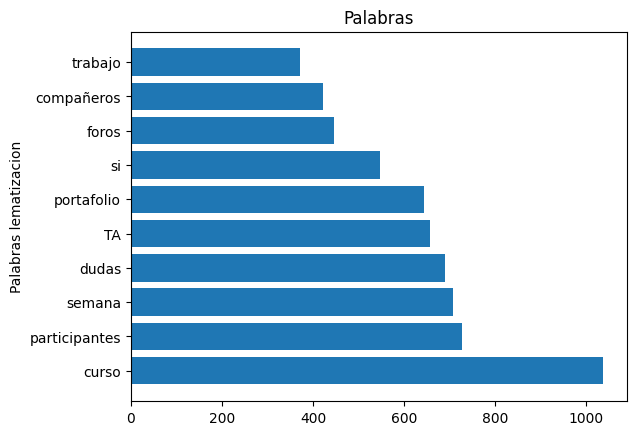

In [19]:
labels = frecuenciaPalabraslematizacion.index.to_numpy()[0:10]
values = frecuenciaPalabraslematizacion.values[0:10]
fig, ax = plt.subplots()
ax.barh(labels, values)

ax.set_ylabel('Palabras lematizacion')
ax.set_title('Palabras')

plt.show()

### Grafica de palabras con mayor frecuencia streaming

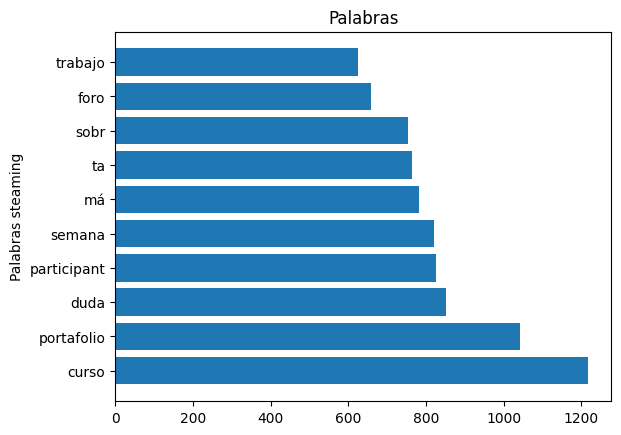

In [20]:
labels = frecuenciaPalabrassteaming.index.to_numpy()[0:10]
values = frecuenciaPalabrassteaming.values[0:10]
fig, ax = plt.subplots()
ax.barh(labels, values)

ax.set_ylabel('Palabras steaming')
ax.set_title('Palabras')

plt.show()

In [21]:
data_frame_frases = pd.DataFrame({"frases":enviados_tokenizados})

In [22]:
def procesosLematizacion(texto):
    frase = word_tokenize(texto)
    lematizacion_frases = [wnl.lemmatize(p, pos="v") for p in frase]
    filtro_frases = [token for token in lematizacion_frases if token not in stopwords.words('spanish')]
    processed_text = ' '.join(filtro_frases)
    return processed_text
data_frame_frases['frases']= data_frame_frases['frases'].apply(procesosLematizacion)

Analisis de Sentimientos

In [23]:
def obtenersentimientoP(texto):
    valores = si.polarity_scores(texto)
    sentimiento = valores['pos']
    return sentimiento
def obtenersentimientoNeg(texto):
    valores = si.polarity_scores(texto)
    sentimiento = valores['neg']
    return sentimiento
def obtenersentimientoNeu(texto):
    valores = si.polarity_scores(texto)
    sentimiento = valores['neu']
    return sentimiento
data_frame_frases['sentimientosPos']= data_frame_frases['frases'].apply(obtenersentimientoP)
data_frame_frases['sentimientosNeg']= data_frame_frases['frases'].apply(obtenersentimientoNeg)
data_frame_frases['sentimientosNeu']= data_frame_frases['frases'].apply(obtenersentimientoNeu)
promedioPorcentajePos = data_frame_frases['sentimientosPos'].mean()
promedioPorcentajeNeu = data_frame_frases['sentimientosNeu'].mean()
promedioPorcentajeNeg = data_frame_frases['sentimientosNeg'].mean()

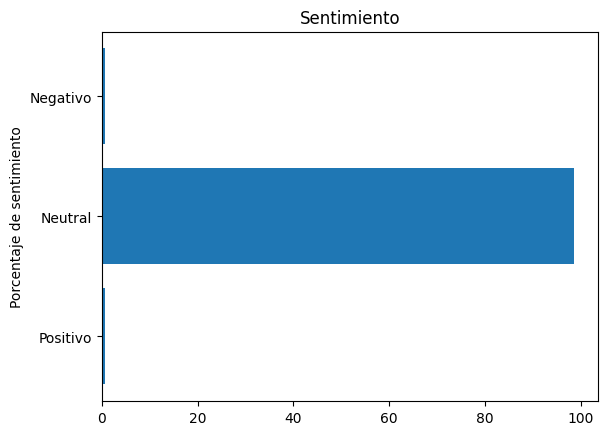

In [24]:
labels = ['Positivo','Neutral','Negativo']
values = [promedioPorcentajePos*100,promedioPorcentajeNeu*100,promedioPorcentajeNeg*100]
fig, ax = plt.subplots()
ax.barh(labels, values)

ax.set_ylabel('Porcentaje de sentimiento')
ax.set_title('Sentimiento')

plt.show()

Reconocimiento de entidades

In [25]:
etiquetas_gramaticales = pos_tag(palabras_tokenizadas )
arbol_entidades = ne_chunk(etiquetas_gramaticales)

In [26]:
print(arbol_entidades)

(S
  (PERSON Abril/NNP)
  (PERSON Vargas/NNP Pérez/NNP)
  opinionesPTValorada/MD
  con/VB
  estrellas/NNS
  sobre/VB
  ago/RB
  (PERSON Escandalizada/NNP)
  y/NNP
  confundida/NN
  por/NN
  lasEscandalizada/NN
  y/NN
  confundida/NN
  por/NN
  las/VBZ
  malas/NNS
  reseñasEstoy/NN
  en/IN
  coursera/NN
  desde/NN
  el/JJ
  mes/NNS
  de/IN
  julio/NN
  y/NN
  estoy/FW
  haciendo/NN
  actualmente/NN
  el/FW
  curso/NN
  de/IN
  frontend/FW
  developer/NN
  que/NN
  imparte/NN
  (ORGANIZATION MetaPara/NNP)
  entrar/VBZ
  a/DT
  este/NN
  curso/NN
  tenías/NN
  que/NN
  pagar/NN
  (PERSON Coursera/NNP Plus/NNP)
  donde/NN
  tienes/NNS
  acceso/VBP
  a/DT
  todos/JJ
  los/NN
  cursos/NN
  por/NN
  euros/NN
  mensuales/NNS
  Duré/NNP
  en/FW
  un/JJ
  periodo/NN
  de/IN
  prueba/FW
  gratis/FW
  de/FW
  días/FW
  y/FW
  al/NN
  vo/IN
  me/PRP
  hicieron/VBP
  el/JJ
  cargo/NN
  Ya/NNP
  llevo/VBZ
  casi/JJ
  dos/NN
  meses/NNS
  haciendo/VBP
  el/JJ
  curso/NN
  y/NN
  no/DT
  me/PRP
  ha/VB

Extraccion de Entidades

In [27]:
def extraer_entidades(nombradas):
    entidades = []
    for subtree in nombradas:
        if isinstance(subtree, nltk.Tree):  
            tipo_entidad = subtree.label() 
            entidad = " ".join([word for word, pos in subtree.leaves()])  
            entidades.append((entidad, tipo_entidad))
    return entidades

entidades_extraidas = extraer_entidades(arbol_entidades)

print(entidades_extraidas)

[('Abril', 'PERSON'), ('Vargas Pérez', 'PERSON'), ('Escandalizada', 'PERSON'), ('MetaPara', 'ORGANIZATION'), ('Coursera Plus', 'PERSON'), ('Quizás', 'PERSON'), ('Richard', 'PERSON'), ('ayudeFecha de', 'ORGANIZATION'), ('ESTAFADORES', 'ORGANIZATION'), ('pagadoFecha de', 'ORGANIZATION'), ('Airin', 'PERSON'), ('Maria Eugenia Simancas Soriano', 'PERSON'), ('CourseraCuidado', 'ORGANIZATION'), ('CourseraSolo', 'ORGANIZATION'), ('Son', 'PERSON'), ('Indira Izurieta', 'PERSON'), ('esperabaCreo', 'ORGANIZATION'), ('continuamenteCon', 'ORGANIZATION'), ('Courser', 'PERSON'), ('Curso', 'PERSON'), ('Universidad', 'GPE'), ('Julio Cesar', 'PERSON'), ('certificadoAl', 'ORGANIZATION'), ('abusivaFecha de', 'ORGANIZATION'), ('Jeanpierre Nuñez', 'PERSON'), ('Microsoft', 'ORGANIZATION'), ('Porqueria', 'GPE'), ('Cristian Gonzalez', 'PERSON'), ('Realmente', 'PERSON'), ('plataformaFecha de', 'ORGANIZATION'), ('Determina', 'GPE'), ('Visnu Da Silva Manriquez', 'PERSON'), ('Solo', 'PERSON'), ('tiFecha de', 'ORGAN

In [28]:
personasCantidad = 0
organizacionesCantidad = 0
gpeCantidad = 0

personasArray = []
organizacionesArray = []
gpeArray = []
for entidad in entidades_extraidas:
    if entidad[1] == 'PERSON':
        personasCantidad += 1
        personasArray.append(entidad)
    if entidad[1] == 'ORGANIZATION':
        organizacionesCantidad += 1
        organizacionesArray.append(entidad)
    if entidad[1] == 'GPE':
        gpeCantidad += 1
        gpeArray.append(entidad)
data_frame_personas = pd.DataFrame({"personas":personasArray})

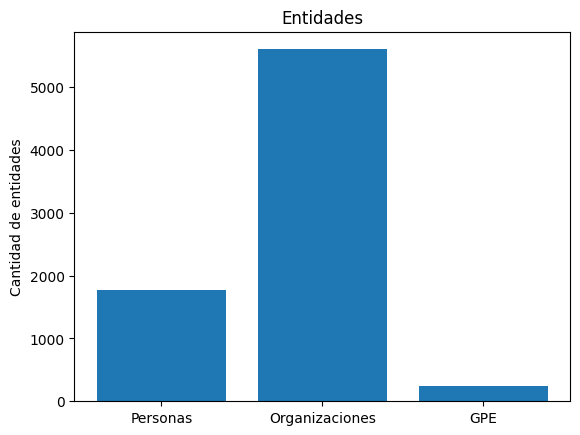

In [29]:
labels = ['Personas','Organizaciones','GPE']
values = [personasCantidad,organizacionesCantidad,gpeCantidad]
fig, ax = plt.subplots()
ax.bar(labels, values)
ax.set_ylabel('Cantidad de entidades')
ax.set_title('Entidades')
plt.show()

In [30]:
personas = data_frame_personas.groupby("personas").size().sort_values(ascending=False)

### Grafico por niveles

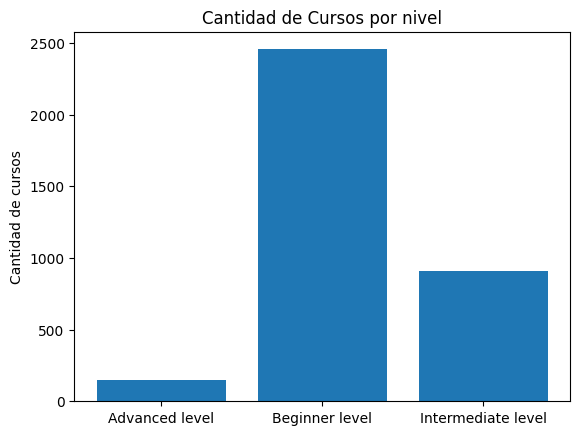

In [31]:
pornivel = datos.groupby("Level").size()
niveles = pornivel.index.to_numpy()
cantidadPorNivel = pornivel.values
fig, ax = plt.subplots()
ax.bar(niveles, cantidadPorNivel)

ax.set_ylabel('Cantidad de cursos')
ax.set_title('Cantidad de Cursos por nivel')

plt.show()

Se tiene que la mayoria de cursos estan en el nivel beginner

In [32]:
porCategoria = datos.groupby("Keyword").size()

In [33]:
categorias = porCategoria.index.to_numpy()

In [34]:
cantidad = porCategoria.values

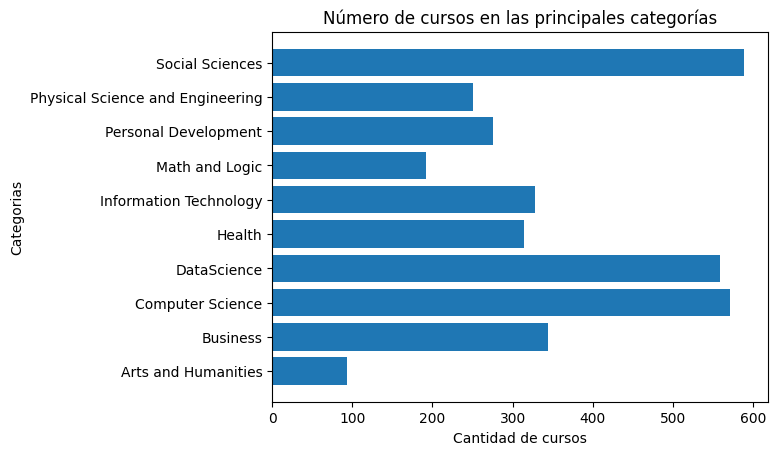

In [35]:
y=categorias
x=cantidad
plt.barh(y, x)
plt.ylabel("Categorias")
plt.xlabel("Cantidad de cursos") 
plt.title("Número de cursos en las principales categorías")
plt.show()

La categoria con mayor numero de cursos es de ciencias sociales y la categoria con la menor cantidad de cursos es de artes y humanidades

In [36]:
revisiones = datos["Review"].str.extractall(r'(\d+)').groupby(level=0).agg(''.join)
revisiones = revisiones.astype(int)

In [37]:
porDuracion = datos["Duration"].values

In [38]:
def calcular_horas_totales(texto):
    meses = re.findall(r'(\d+)\s*months?', texto)
    meses = int(meses[0]) if meses else 0
    
    horas_semana = re.findall(r'(\d+)\s*hours?\s*a\s*week', texto)
    horas_semana = int(horas_semana[0]) if horas_semana else 0
    
    if meses and horas_semana:
        semanas_totales = meses * 4  # Asumimos 4 semanas por mes
        horas_totales = semanas_totales * horas_semana
    else:
        horas_totales = sum(map(int, re.findall(r'(\d+)\s*hours?', texto)))
    
    return horas_totales


data = np.array(porDuracion)
horas_totales_por_curso = [calcular_horas_totales(texto) for texto in data]

Grafico de relacion con la duracion y las reviciones

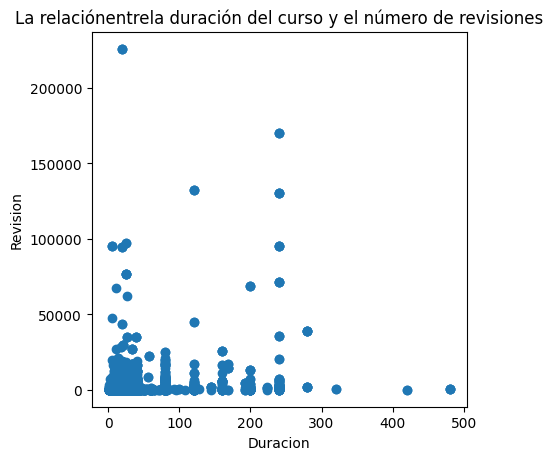

In [39]:
x = horas_totales_por_curso
y = revisiones
def scatter_hist(x, y, ax):

    ax.scatter(x, y)
    ax.set_ylabel('Revision')
    ax.set_xlabel('Duracion')
    ax.set_title('La relaciónentrela duración del curso y el número de revisiones')
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)


fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
scatter_hist(x, y, ax)


Se puede observar que al disminuir el tiempo aumenta la cantidad de revisiones.

In [40]:
AgrupacionporDuracion = datos.groupby("Duration").size()
data = np.array(AgrupacionporDuracion.index.to_numpy())
agradas_horas_totales_por_curso = [calcular_horas_totales(texto) for texto in data]

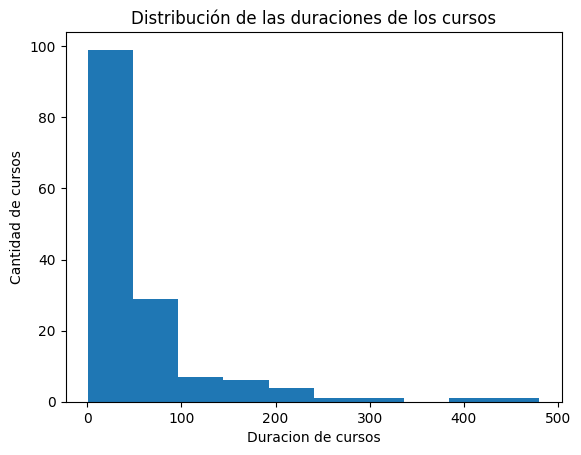

In [41]:
x = agradas_horas_totales_por_curso
y = AgrupacionporDuracion.values
# Histograma
fig, ax = plt.subplots()
ax.hist(x)
ax.set_title('Distribución de las duraciones de los cursos')
ax.set_ylabel('Cantidad de cursos')
ax.set_xlabel('Duracion de cursos')
plt.show()

Se puede ver que la mayoria de cursos tienden a ser de corta duracion.

In [42]:
ratings = datos.groupby("Level")['Rating'].apply(list)

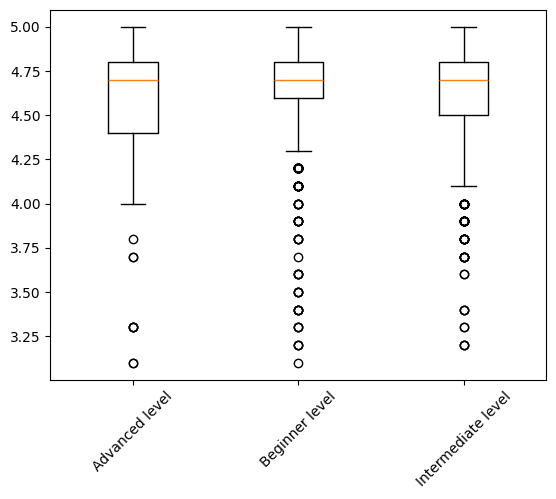

In [43]:
labels = ratings.index.to_numpy()
x = ratings.values
fig, ax = plt.subplots()
ax.boxplot(x)
ax.set_xticks(range(1, len(labels) + 1))
ax.set_xticklabels(labels, rotation=45, fontsize=10)
plt.show()

Se tiene puede observar que el rating de los cursos avanzados es asimetrico con la mayor cantidad arriba de la media y con pocos valores
atipicos, los de principiantes son mas simetricos con un buen rating y por ultimo los intermedios que tambien es asimetrico mantiendo la mayoria 
debajo de la media.

Se tiene que la mayoria de cursos fueron en nivel principiante despues intermedio y por ultimo avanzado pero se mantiene una buana calidad de cursos a lo largo de los tres niveles.

Python con las librerias pandas,numpy y nlkt nos brinda las herramientas para realizar un buen analisis de distintas fuentes de informacion y poder obtener un despliegue de manera grafica de la informacion para un mejor entendimiento.